# Setup

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import statsmodels.api as sm

In [3]:
df = pd.read_csv('airline.csv')
df.head(2)

,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
0,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,D Ito,Germany,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min f...,NaN,NaN,Economy,NaN,7.0,4.0,4.0,4.0,0.0,NaN,NaN,4.0,1
1,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Ron Kuhlmann,United States,2015-01-05,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,NaN,NaN,Business Class,NaN,10.0,4.0,5.0,4.0,1.0,NaN,NaN,5.0,1


In [4]:
df_emi = df[df.airline_name=='emirates']
df_emi.head(2)


,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
14773,emirates,/airline-reviews/emirates,Emirates customer review,B Finn,Australia,2015-08-02,Overall we found the experience disappointing....,A380,FamilyLeisure,Economy,Singapore to Paris via Dubai,5.0,3.0,1.0,2.0,3.0,4.0,3.0,3.0,0
14783,emirates,/airline-reviews/emirates,Emirates customer review,Michael Leibman,South Africa,2015-07-28,Flight from Cape Town was late into Dubai due ...,Boeing 777 and A380,Couple Leisure,Business Class,Cape Town to London via Dubai,7.0,3.0,3.0,3.0,4.0,2.0,2.0,3.0,0


In [5]:
df_emi.describe()

,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
count,690.000000,691.000000,691.000000,688.000000,688.000000,61.000000,35.000000,691.000000,691.000000
mean,6.246377,3.596237,3.287988,3.453488,4.190407,3.508197,3.142857,3.609262,0.615051
std,3.088937,1.207675,1.543425,1.351322,1.075096,1.409763,1.497898,1.329978,0.486936
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,3.000000,3.000000,2.000000,2.000000,4.000000,3.000000,2.000000,3.000000,0.000000
50%,7.000000,4.000000,4.000000,4.000000,5.000000,4.000000,3.000000,4.000000,1.000000
75%,9.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [6]:
df_emi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691 entries, 14773 to 15808
Data columns (total 20 columns):
airline_name                     691 non-null object
link                             691 non-null object
title                            691 non-null object
author                           691 non-null object
author_country                   690 non-null object
date                             691 non-null object
content                          691 non-null object
aircraft                         50 non-null object
type_traveller                   61 non-null object
cabin_flown                      691 non-null object
route                            61 non-null object
overall_rating                   690 non-null float64
seat_comfort_rating              691 non-null float64
cabin_staff_rating               691 non-null float64
food_beverages_rating            688 non-null float64
inflight_entertainment_rating    688 non-null float64
ground_service_rating            61 non

# Data Wrangling

In [9]:
df_emi.date=pd.to_datetime(df_emi.date) #change date object into datetime format
df_emi=df_emi[df_emi.date>='2010-01-01'] 
df_emi.shape

(691, 20)

In [10]:
#drop data points without overall rating
df_clean=df_emi[df_emi['overall_rating'].notnull()]

In [11]:
#drop some attributes that will not be used in modelling
df_clean.drop(['airline_name','link','title','author','author_country','date','content','aircraft','route','recommended'],axis=1, inplace=True)


C:\Users\palak\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
df_clean.head()

,type_traveller,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating
14773,FamilyLeisure,Economy,5.0,3.0,1.0,2.0,3.0,4.0,3.0,3.0
14783,Couple Leisure,Business Class,7.0,3.0,3.0,3.0,4.0,2.0,2.0,3.0
14784,Couple Leisure,Economy,9.0,5.0,4.0,4.0,5.0,4.0,NaN,5.0
14794,Couple Leisure,Business Class,10.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0
14795,FamilyLeisure,Economy,6.0,4.0,3.0,5.0,5.0,3.0,1.0,3.0


In [14]:
#deal with missing values
df_clean=df_clean.fillna({'ground_service_rating':0, 'wifi_connectivity_rating':0,'seat_comfort_rating':0,'cabin_staff_rating':0,'food_beverages_rating':0,'inflight_entertainment_rating':0, 'value_money_rating':0}, inplace=True)


C:\Users\palak\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [15]:
#change types cabin flown and traveler types into category type
df_cabin_flown= pd.get_dummies(df_clean['cabin_flown'])
df_clean=pd.concat([df_clean, df_cabin_flown], axis=1)
df_clean.drop(['cabin_flown'], axis=1, inplace=True)

df_type_traveller= pd.get_dummies(df_clean['type_traveller'])
df_clean=pd.concat([df_clean, df_type_traveller], axis=1)
df_clean.drop(['type_traveller'], axis=1, inplace=True)

# Inferential Statistics

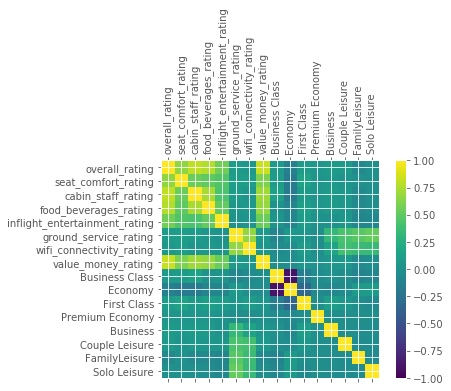

In [17]:
correlations=df_clean.corr()
names=df_clean.columns
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,16,1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

From the above table, we see that there are much correlations between cabin staff, food beverages rating and value money rating. Hence, there might be huge bias in case of OLS due to multi-colinearity

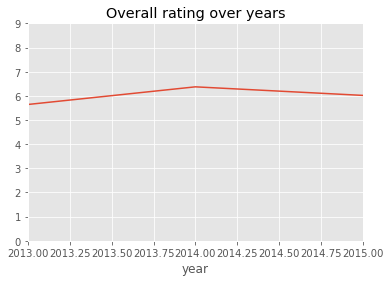

In [18]:
df_emi['year']=df_emi.date.dt.year
df_emi.groupby('year')[['overall_rating']].mean().plot()
plt.title('Overall rating over years')
plt.yticks(np.arange(0,10,1))
plt.legend().remove()
plt.show()

The overall rating has risen slightly from around 5.7 to 6.0 point on scale of 10 in 2010-2015 period, which may suggest there has not been much improvement in rating for Emirates airlines. 

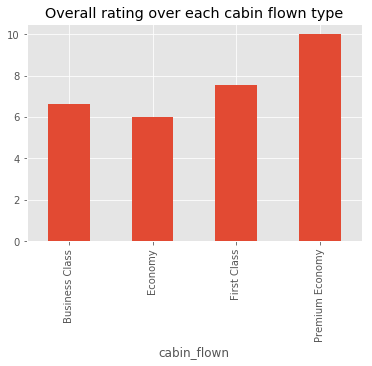

In [20]:
df_emi.groupby('cabin_flown')[['overall_rating']].mean().plot(kind='bar')
plt.title('Overall rating over each cabin flown type')
plt.legend().remove()
plt.show()

In [21]:
df_emi.groupby('cabin_flown').size()

cabin_flown
Business Class     194
Economy            461
First Class         35
Premium Economy      1
dtype: int64

The rating is similar for economy and business class (around 6.5), while first class seems to enjoy more for Emirates service (nearly 8/10). There is only 1 data point for premium economy class, so we cannot infer much from this.

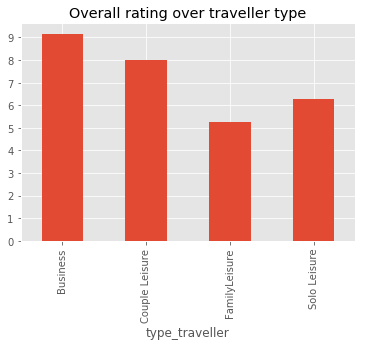

In [22]:
df_emi.groupby('type_traveller')[['overall_rating']].mean().plot(kind='bar')
plt.title('Overall rating over traveller type')
plt.yticks(np.arange(0,10,1))
plt.legend().remove()
plt.show()

Business and couple show much more preference in Emirate services while family and solo traveller seem rather dissatisfied (less than 6 score).

In [23]:
# Test Ho: the mean of overall rating for business/couple and family/solo traveller are equal
bi_cou=df_emi[(df_emi.type_traveller=='Business')|(df_emi.type_traveller=='Couple Leisure')].overall_rating
fa_solo=df_emi[(df_emi.type_traveller=='FamilyLeisure')|(df_emi.type_traveller=='Solo Leisure')].overall_rating
stats.ttest_ind_from_stats(bi_cou.mean(), bi_cou.std(),len(bi_cou),fa_solo.mean(), fa_solo.std(),len(fa_solo), equal_var=False)


Ttest_indResult(statistic=4.1861727820116901, pvalue=0.00010667963246993432)

p_value< 0.01, so we can reject the null hypothesis. We may then continue to segment to see what accounts for the difference 

In [25]:
df_emi.groupby(['type_traveller']).size()

type_traveller
Business           6
Couple Leisure    12
FamilyLeisure     22
Solo Leisure      21
dtype: int64

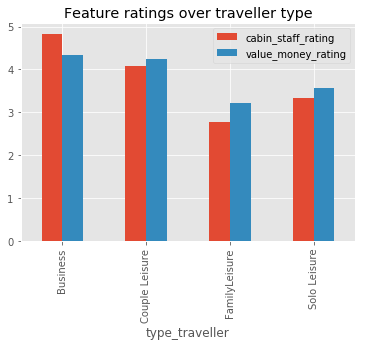

In [26]:
#df_emi.groupby('type_traveller')[['inflight_entertainment_rating','food_beverages_rating','cabin_staff_rating','seat_comfort_rating','ground_service_rating','wifi_connectivity_rating','value_money_rating']].mean().plot(kind='bar')
df_emi.groupby('type_traveller')[['cabin_staff_rating','value_money_rating']].mean().plot(kind='bar')
plt.title('Feature ratings over traveller type')
plt.legend()
plt.show()

In [27]:
# Test Ho: the mean of cabin staff rating for business/couple and family/solo traveller are equal
bi_cou=df_emi[(df_emi.type_traveller=='Business')|(df_emi.type_traveller=='Couple Leisure')].cabin_staff_rating
fa_solo=df_emi[(df_emi.type_traveller=='FamilyLeisure')|(df_emi.type_traveller=='Solo Leisure')].cabin_staff_rating
stats.ttest_ind_from_stats(bi_cou.mean(), bi_cou.std(),len(bi_cou),fa_solo.mean(), fa_solo.std(),len(fa_solo), equal_var=False)

Ttest_indResult(statistic=3.7196955548938462, pvalue=0.00051275623888871811)

Cabin staff and value money ratings are significantly lower for Family and Solo travellers than Business or couple.

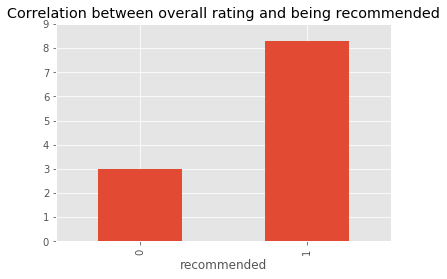

In [29]:
df_emi.groupby('recommended')[['overall_rating']].mean().plot(kind='bar')
plt.title('Correlation between overall rating and being recommended')
plt.yticks(np.arange(0,10,1))
plt.legend().remove()
plt.show()

This shows strong positive correlation between overall rating and being recommended. Hence, we only choose one for our analysis 

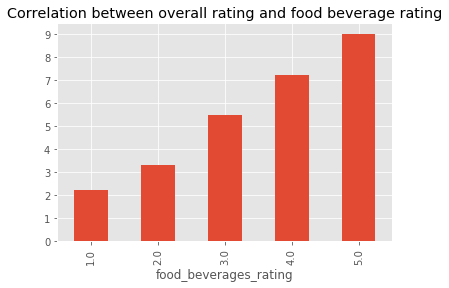

In [31]:
df_emi.groupby('food_beverages_rating')[['overall_rating']].mean().plot(kind='bar')
plt.title('Correlation between overall rating and food beverage rating')
plt.yticks(np.arange(0,10,1))
plt.legend().remove()
plt.show()

This relationship also makes sense. The higher score for food beverages, the higher the overall score.

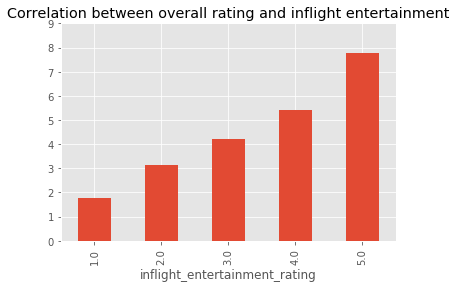

In [32]:
df_emi.groupby('inflight_entertainment_rating')[['overall_rating']].mean().plot(kind='bar')
plt.title('Correlation between overall rating and inflight entertainment')
plt.yticks(np.arange(0,10,1))
plt.legend().remove()
plt.show()